In [1]:
# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# scikit-learn library
import sklearn

In [2]:
##############################
# ML vs classical statistics #
##############################

# ML: Predictive accuracy is more important than analytical understanding of the
# math behind the model

#################################################
# Supervised vs. unsupervised models / learning #
#################################################

# Supervised: E.g. MRI pictures from a patient cohort
# For every picture you already have an annotation you care about (e.g. healthy vs.cancer)

# Unsupervised: Transcriptomics data from a cancer cohort. Maybe identify some underlying structure
# E.g. finding molecular subtypes you didn't know before

In [ ]:
# Loading, preprocessing, cleaning data is the most crucial step
# (~90% of the whole game boils down this)

# Load example dataset
from sklearn.datasets import load_iris
iris = load_iris()

# And inspect it:

# Description
print(iris.DESCR)

# Numbers
print(iris.data)

# Target labels (num.)
print(iris.target)

# Target labels (species names)
print(iris.target_names)

Text(0, 0.5, 'Sepal WIdth [cm]')

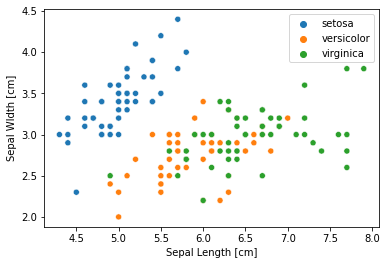

In [5]:
# First things first: inspect the data
# Ex: Anscombe's quartet

sns.scatterplot(x = iris.data[:, 0],
                y = iris.data[:, 1],
                hue = iris.target_names[iris.target])
plt.xlabel("Sepal Length [cm]")
plt.ylabel("Sepal WIdth [cm]")


Text(0, 0.5, 'Petal Width [cm]')

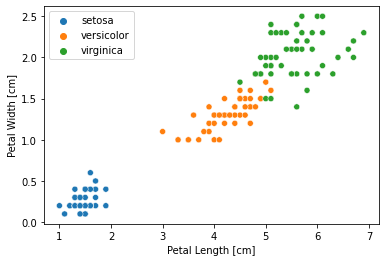

In [6]:
sns.scatterplot(x = iris.data[:, 2],
                y = iris.data[:, 3],
                hue = iris.target_names[iris.target])
plt.xlabel("Petal Length [cm]")
plt.ylabel("Petal Width [cm]")


In [ ]:
###################################
# Build a (supervised) classifier #
###################################

# Goal: predict species of plant when given only the four numbers (Petal / Septal Width and Length)

# First approach: "Support Vector Machine"

![title](https://miro.medium.com/max/700/1*06GSco3ItM3gwW2scY6Tmg.png)

In [7]:
# Learning the actual classifier

# Load the model definition ("recipe")
from sklearn.svm import LinearSVC

# Make an instance (object) of this classifier
clf = LinearSVC()

# Train the model with our input data
clf.fit(iris.data, iris.target)

# It's trained!

/home/mmf/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [8]:
# Let's make up two new data points as sanity check
# We hope for: Model predicts the first data point to be I. setosa,
# and the second one to be I. versicolor
x = [[5.0, 3.5, 1.5, 0.3],
    [6.0, 3.0, 4, 1.5]]

iris.target_names[clf.predict(x)]

# Looks about right!

# For "testing" we made up data
# We cannot guarantee that the model will always have such a nice predictive power

array(['setosa', 'versicolor'], dtype='<U10')

In [ ]:
######################
# Train / Test Split #
######################

# Idea: Split our input data into a training subset (~70%), and a testing subset (~30%)
# Train the model *only* using the training subset
# Afterwards, use test dataset with known labels to assess model performance

# Important: Split has to be done randomly

In [9]:
# Splitting can be done with a convenience method
data_train, data_test, labels_trains, labels_test = \
    sklearn.model_selection.train_test_split(iris.data, iris.target, train_size = 0.7)

# Make another instance (object) of this classifier
clf2 = LinearSVC()

# Train it, but only using the train dataset
clf2.fit(data_train, labels_trains)

# Use new classifier (that has never seen the testing dataset!) to predict
# the labels of the testing dataset
labels_test_predicted = clf2.predict(data_test)

# Count correctly classified data points in the testing dataset
print("Nb. of correct predictions for the testing dataset: ", sum(labels_test_predicted == labels_test))
print("Corresponding to Percentage of: ", sum(labels_test_predicted == labels_test) / 45)

# We want to check which classes are classified correctly / wrongly the most often
# => "Confusion Matrix"
# 3x3 matrix, rows: true labels, columns: predicted labels
sklearn.metrics.confusion_matrix(y_true = labels_test, y_pred = labels_test_predicted)

Nb. of correct predictions for the testing dataset:  42
Corresponding to Percentage of:  0.9333333333333333


/home/mmf/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[19,  0,  0],
       [ 0, 15,  3],
       [ 0,  0,  8]])

In [10]:
# Observation: If we rerun the previous cell, the results differ (slightly)
# This is due to the random nature of the test/train split we do in the beginning

# Idea: Maybe we do not want to train exactly one model once,
# but instead train a bunch of models with slightly different subsets of the training dataset

# If we train models based on different subsets,
# then the models would ideally all say the same.
# => We can quantify the uncertainty of prediction.

# People usually do this approach by using a model that's called DECISION TREE
# An ensemble of e.g. 1000 decision trees is called (random) FOREST

![title](https://forum.huawei.com/enterprise/en/data/attachment/forum/202103/24/190400o09x7rhnnhy2yon7.png?1.png)

In [11]:
# First, we just fit one single decision tree

In [ ]:
# Why would we even want to use a decision tree instead of a SVM or something else?
# 1.) SVMs can only deal with numbers, but a DT can work with numbers and categorical data too
# 2.) A decision tree can easily be printed out, and can also easily intuitively be understood


Nb. of correct predictions for the testing dataset:  45
Corresponding to Percentage of:  1.0


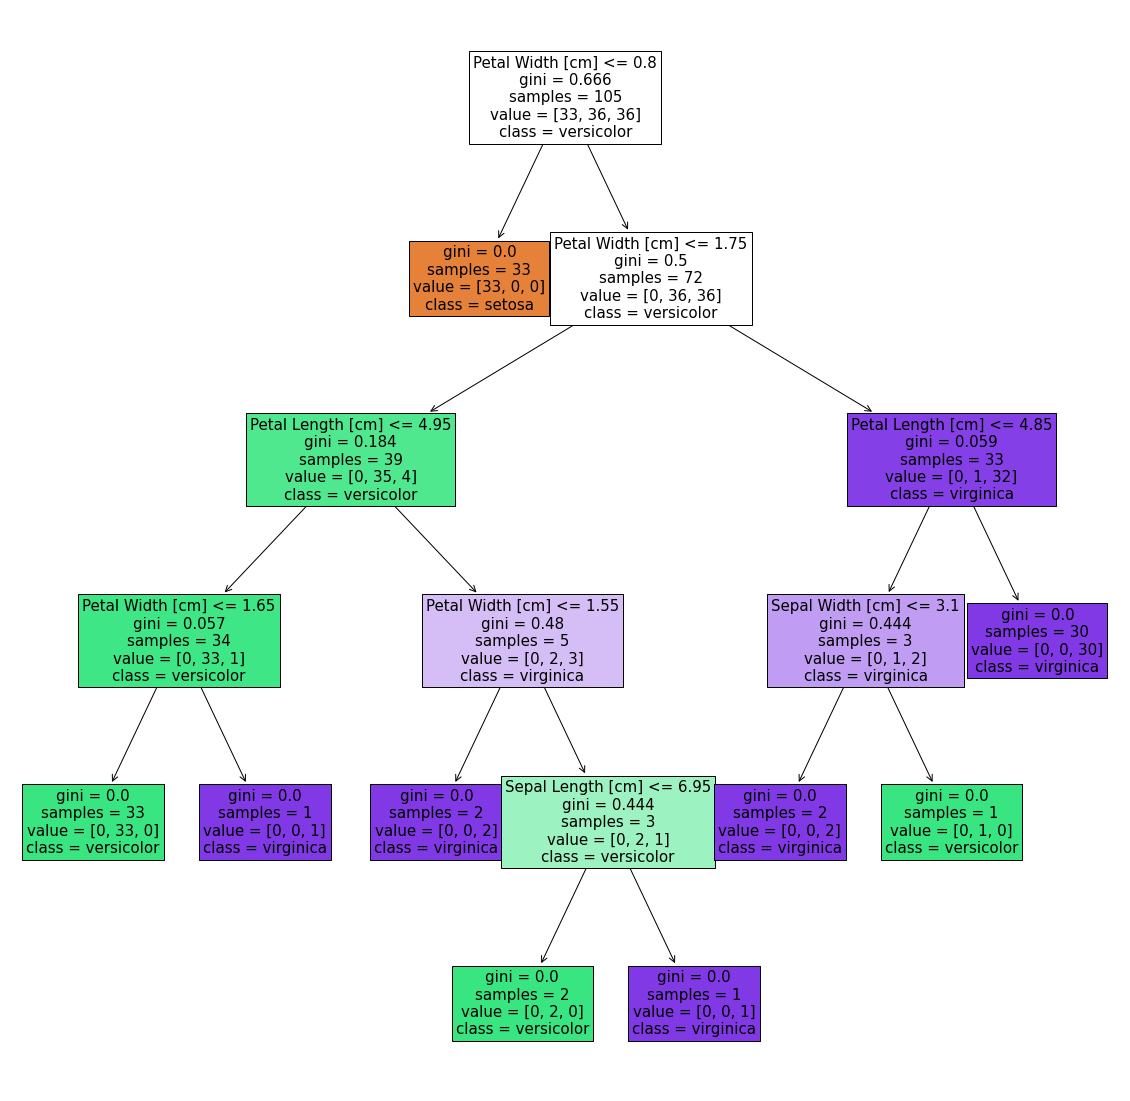

In [12]:
#######################
# FIT A DECISION TREE #
#######################

# Load model definition ("recipe")
from sklearn.tree import DecisionTreeClassifier

# Instantiate: we make a new classifier object based on that definition
clf3 = DecisionTreeClassifier()

# First, we need to agin split our dataset into train and test
data_train, data_test, labels_trains, labels_test = \
    sklearn.model_selection.train_test_split(iris.data, iris.target, train_size = 0.7)

# Train / "fit" the decision tree using the training dataset
clf3.fit(data_train, labels_trains)

# Predict labels for the testing dataset
labels_test_predicted = clf3.predict(data_test)

# Count correctly classified data points in the testing dataset
print("Nb. of correct predictions for the testing dataset: ", sum(labels_test_predicted == labels_test))
print("Corresponding to Percentage of: ", sum(labels_test_predicted == labels_test) / 45)

# Confusion matrix
sklearn.metrics.confusion_matrix(y_true = labels_test, y_pred = labels_test_predicted)

# A better convenience function for plotting the learned tree written by myself
fig, ax = plt.subplots(1, 1, figsize=(20,20))
sklearn.tree.plot_tree(clf3,
               feature_names = ["Sepal Length [cm]", "Sepal Width [cm]", "Petal Length [cm]", "Petal Width [cm]"],
               class_names = iris.target_names,
               filled=True,
               fontsize=15, ax=ax);

# -> explainable AI / ML. You cannot really do that nicely if you train more
# complicated models, for instance neural networks

In [ ]:
###################
# ENSEMBLE MODELS #
###################

# Learning a bunch of "experts" (individual decision trees, which are based on random
# subsets of the training dataset), and do "vote counting"

![title](https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/example-of-random-forest-classifier.png)

In [ ]:
# Missing in this illustration is the idea, that you can calculate the fractions of votes
# 95%, 3%, 2% -- high confidence in prediction
# 40%, 30%, 30% -- certainty / confidence of this prediction is very low

# This is the great advantage of a *ensemble* of models

In [13]:
#########################
# TRAIN A RANDOM FOREST #
#########################


# Load model definition from the library scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Instantiate again -- make a new object of this classifier
# random_state for reproducibility
clf4 = RandomForestClassifier(n_estimators = 50, random_state = 0)

# First, we need to agin split our dataset into train and test
data_train, data_test, labels_trains, labels_test = \
    sklearn.model_selection.train_test_split(iris.data, iris.target, train_size = 0.7)

# Fit
# All of the used random subsets for training the individual decision trees
# are subsets only of the training dataset!
clf4.fit(data_train, labels_trains)

# Get predicted labels for the test dataset
# There aren't any metrics of predicitive certainty here
labels_test_predicted = clf4.predict(data_test)

# But there is a function in the classifier to get these estimates too
clf4.predict_proba(data_test)

# Some made-up data for illustration
# Make one not-so-nice example and one nice example
# We expect: first example should be rather inconclusive (second or third species)
# second example should be very certain (belongs to first Iris species)
# Seems to work nicely
x = [[6.0, 4.0, 5.0, 1.7],
    [5.0, 3.5, 1.5, 0.25]]
clf4.predict_proba(x)


array([[0.  , 0.66, 0.34],
       [1.  , 0.  , 0.  ]])

In [84]:
################
# UNSUPERVISED #
################

# Assume we have the Iris dataset again, but we don't have any labels for the data points
# What we would like to do now is using ML to try to find some kind of underlying / hidden structure
# in the dataset

# First main concept: dimensionality reduction
# Idea: we have a dataset (e.g. transcriptomics) with lots of columns ("features"). 
# And we are trying to find some kind of lower-dimensional representation of the data

# Ex: transcriptomics dataset (40'000 columns) -> PCA (2 columns: x,y)
# Implicit assumption / hope: that these two columns/dimensions contain the largest chunk of information 
# you care about. In contrast, the remaining variation that is not captured within these two dimensions
# is noise.

# PCA: Simple, fast, explainable to a certain degree.
# Other, more modern and complicated methods include t-sne (kinda outdated), UMAP, diffusion maps



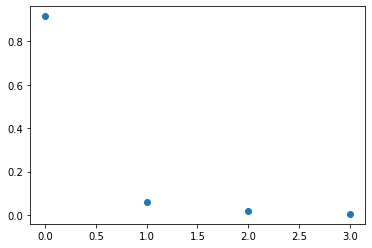

In [14]:
# Load model defn
from sklearn.decomposition import PCA

# Make object of this model
# n_components: number of new dimensions that you want the model to *construct*
pca = PCA(n_components = 4)

# Do it the right way: test and training split
# First, we need to agin split our dataset into train and test
data_train, data_test, labels_trains, labels_test = \
    sklearn.model_selection.train_test_split(iris.data, iris.target, train_size = 0.7)

# Fit it
# No labels -- because we are in an unsupervised setting, after all
pca.fit(data_train)

# Elbow plot
# Nice diagnostic tool to answer the question how many of the learned new components / columns
# actually carry information
plt.plot(pca.explained_variance_ratio_, "o")

# It seems a good assumption that only the first principal component carries significant information

# Exemplary elbow plot might look like:
![title](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png)

/home/mmf/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mmf/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

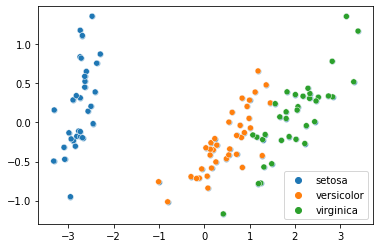

In [15]:
# Need to use the fitted model in order to transform our input data into the low-dim space
# that we have just learned
output = pca.transform(data_train)

# Plot the first column because it carries the relevant information
# and we also plot the second column (principal component) to make the
# plot easier to read
sns.scatterplot(output[:,0], output[:,1])

# We here have labels so we can use them to check how well the model did
# Usually, IRL in an unsupervised setting we do not have these
sns.scatterplot(output[:,0], output[:,1], hue=iris.target_names[labels_trains])

# Indeed, the PCA has reduced a four-dimensional input dataset to its intrinsic dimensionality of 1 dimension
# and along this one dimension (x-axis) the three species slit pretty nicely!


In [ ]:
##################################
# A SECOND UNSUPERVISED APPROACH #
##################################

# Clustering.

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/1920px-Cluster-2.svg.png)

In [107]:
# Main idea: Identify groups of data points that have a very high similarity *within*, but a very low similarity
# compared to all the other data points

# There are lots of different clustering algorithms.
# All of these usually have lots of parameters you can "tune"
# Malicious gossip has it that: "tune" = "play around with until you find something that looks nice"

# There are lots of "researcher degrees of freedom". Turning these parameters long enough, you can
# produce basically every plot you want to.

# Clustering even white noise without any information will nonetheless always
# proudce some """clusters"""

In [ ]:
# We do a k-means clustering.
# Refers to a parameter "k" -- number of clusters that the model should try to find.
# There are ways to optimise "k" without introducing personal bias (see below).
# First let's just use k=3



/home/mmf/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

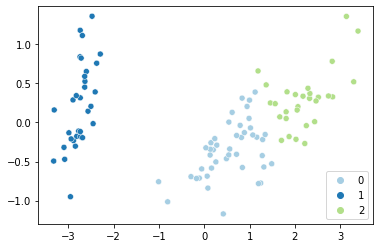

In [16]:
# First load the defn
from sklearn.cluster import KMeans

# Make model
km = KMeans(n_clusters = 3)

# Fit the model
km.fit(data_train)

# Let's inspect the model's results by using the labels we here have available
# (IRL you don't have them in a case of unsupervised learning)
# The labels the model has learned are in km.labels_
# We plot our data point in PCA space that we have learned earlier,
# because in this way we may plot our 4-d dataset nicely in 2-d
sns.scatterplot(output[:,0], output[:,1], hue=km.labels_, palette="Paired")

# if we compared the indentified clusters with the species annotation (see earlier),
# we indeed find a strong similarity

2 152.34795176035792
3 78.85144142614601
4 57.228473214285714
5 46.44618205128205
6 39.03998724608725
7 34.883956417112294
8 30.186555194805194
9 28.024976812661023
10 26.27107797903851


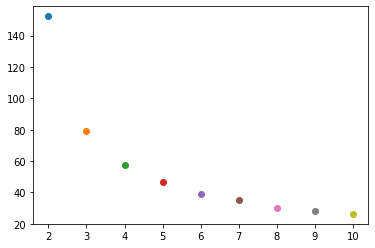

In [17]:
# There is a way of determining the optimal k
# Basically, we try out k=2,k=3,.....,
# and at some point we see that the clustering stops to become any more informative

for k in [2,3,4,5,6,7,8,9,10]:
    km = KMeans(n_clusters = k)
    km.fit(iris.data)
    #Inertia: a number that quantifies the unexplained variability in the clustering
    print(k, km.inertia_)
    plt.scatter(k, km.inertia_)

# Indeed, k=3 seems to be the optimal choice
# capturing much of the information, but cutting out much of the noise

# Nonetheless, even if you determine k in such an unbiased way,
# there are still lots of things which you can basically choose yourself ad lib
# (clustering algorithm, exact distance function used to determine point similarity, etc)
# Thus, don't fool yourself.
